# Implementation of the Liquorlicious Cookie Generator

## Loading the Inspiring Set

In [1]:
import json
import pprint
import random
import math

f = open('recipe_set.json')

recipes = json.load(f)

all_ingredients = []
for recipe in recipes:
    for r_index in range(len(recipe['ingredients'])):
        all_ingredients.append({'ingredients':recipe['ingredients'][r_index], 
                                'amount':recipe['amount'][r_index], 
                                'unit':recipe['unit'][r_index], 
                                'category':recipe['category'][r_index], 
                                'cat_freq':recipe['cat_freq'][r_index], 
                                'base':recipe['base'][r_index]})

Code below checks what ingredients have multiple units

In [2]:
ing = []
for i in all_ingredients:
    ing.append(i['ingredients'])

ing_units = []
for i in list(set(ing)):
    units = []
    for j in all_ingredients:
        if i == j['ingredients']:
            units.append(j['unit'])
    units = set(units)
    if len(units) > 1:
        print(i, units)
    ing_units.append([i, units])

flour {'cup', 'tbs'}
mashed banana {'cup', 'cups'}
vanilla extract {'tbs', 'tsp'}
cocoa powder {'cup', 'tbs'}
brown sugar {'cup', 'tbs'}
sea salt {'pinch', 'tsp'}
salt {'pinch', 'tsp'}
molasses {'cup', 'tbs'}
butter {'cup', 'tbs'}


## Creating an Initial Population

Now we can create an initial population, by first defining the population size and then selecting from the list of recipes.

In [3]:
population_size = 20
population = random.choices(recipes, k=population_size)

# display population titles
for p in population:
    print(p['title'])

gluten free chocolate chip cookies
brown sugar beer cookies 
pumpkin chocolate chip cookies
rum spiked chocolate chip cookies 
healthy zucchini cookies (paleo)
white chocolate cranberry cookies
pumpkin oatmeal cookie recipe
banana oatmeal cookies
healthy zucchini cookies (paleo)
lactation cookies
pumpkin oatmeal cookie recipe
peanut butter oatmeal cookies
brown sugar beer cookies 
chocolate brownie cookies reicpe
gluten free chocolate chip cookies
soft gingerbread cookies
banana oatmeal cookies
white chocolate chip cookies
gluten free chocolate chip cookies
brown sugar beer cookies 


## Evaluating Recipes (Fitness Function)

In [4]:
def evaluate_recipes(recipes):
  for r in recipes:
    r['fitness'] = len(r['ingredients'])

In [5]:
evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

# display population fitness
for p in population:
    print(p['fitness'], p['title'])

15 lactation cookies
14 pumpkin oatmeal cookie recipe
14 pumpkin oatmeal cookie recipe
13 pumpkin chocolate chip cookies
12 healthy zucchini cookies (paleo)
12 healthy zucchini cookies (paleo)
12 peanut butter oatmeal cookies
11 brown sugar beer cookies 
11 white chocolate cranberry cookies
11 brown sugar beer cookies 
11 soft gingerbread cookies
11 brown sugar beer cookies 
10 gluten free chocolate chip cookies
10 rum spiked chocolate chip cookies 
10 chocolate brownie cookies reicpe
10 gluten free chocolate chip cookies
10 white chocolate chip cookies
10 gluten free chocolate chip cookies
8 banana oatmeal cookies
8 banana oatmeal cookies


## Selecting Recipes

The following function implements Roulette Wheel selection of individuals based on their fitness:

In [6]:
def select_recipe(recipes):
  sum_fitness = sum([recipe['fitness'] for recipe in recipes])
  f = random.randint(0, sum_fitness)
  for recipe in recipes:
    if f < recipe['fitness']:
      return recipe
    f -= recipe['fitness']
  return recipes[-1]

## Genetic Operators

Helper functions for crossover_recipes

In [7]:
def get_partial_recipe(recipe, start, end):
    
    partial_recipe = {}
    partial_recipe['ingredients'] = recipe['ingredients'][start:end]
    partial_recipe['amount'] = recipe['amount'][start:end]
    partial_recipe['unit'] = recipe['unit'][start:end]
    partial_recipe['category'] = recipe['category'][start:end]
    partial_recipe['cat_freq'] = recipe['cat_freq'][start:end]
    partial_recipe['base'] = recipe['base'][start:end]
    
    return partial_recipe

def combine_recipes(r1, r2):
    combined = {}
    combined['ingredients'] = r1['ingredients'] + r2['ingredients']
    combined['amount'] = r1['amount'] + r2['amount']
    combined['unit'] = r1['unit'] + r2['unit']
    combined['category'] = r1['category'] + r2['category']
    combined['cat_freq'] = r1['cat_freq'] + r2['cat_freq']
    combined['base'] = r1['base'] + r2['base']
    
    return combined

In [8]:
recipe_number = 1

def crossover_recipes(r1, r2):
    global recipe_number
    p1 = random.randint(1, len(r1['ingredients']))
    p2 = random.randint(0, len(r2['ingredients'])-1)
    
    r1a = get_partial_recipe(r1, 0, p1)
    r2b = get_partial_recipe(r2, p2, len(r2['ingredients']))
    
    r = dict()
    r['name'] = "recipe {}".format(recipe_number)
    recipe_number += 1
    r = combine_recipes(r1a, r2b)
    return r

The mutation operator changes a recipe using one of several different types of mutations:
1. increasing the amount of an ingredient by 10%
2. decreasing the amount of an ingredient by 10%
3. changing the ingredient to a random ingredient
4. changing the ingredient to one in its own category
5. adding an ingredient
6. removing an ingredient

In [9]:
def mutate_recipe(r):    
    weights = [1,1,.25,.5,.5,.25]
    m = random.choices(list(range(6)), weights=weights, k=1)[0]
    
    # increase amount by 10%
    if m == 0:
        i = random.randint(0, len(r['ingredients'])-1)
        r['amount'][i] += r['amount'][i] * 0.1
    
    # decrease amount by 10%
    elif m == 1:
        i = random.randint(0, len(r['ingredients'])-1)
        r['amount'][i] -= r['amount'][i] * 0.1
        
    # replace ingredient by another ingredient
    elif m == 2: 
        i = random.randint(0, len(r['ingredients'])-1)
        ing = random.choice(all_ingredients)
        r['ingredients'][i] = ing['ingredients']
        r['amount'][i] = ing['amount']
        r['unit'][i] = ing['unit']
        r['category'][i] = ing['category']
        r['cat_freq'][i] = ing['cat_freq']
        r['base'][i] = ing['base']
    
    # replace ingredient by another ingredient in same category
    # to do:
    elif m == 3:
        mutate_recipe(r)
    
    # add random ingredient
    elif m == 4:
        ing = random.choice(all_ingredients)
        r['ingredients'].append(ing['ingredients'])
        r['amount'].append(ing['amount'])
        r['unit'].append(ing['unit'])
        r['category'].append(ing['category'])
        r['cat_freq'].append(ing['cat_freq'])
        r['base'].append(ing['base'])
        
    # remove random ingredient
    else:
        if len(r['ingredients']) > 1:
            i = random.randint(0, len(r['ingredients'])-1)
            del r['ingredients'][i]
            del r['amount'][i]
            del r['unit'][i]
            del r['category'][i]
            del r['cat_freq'][i]
            del r['base'][i]

The following function is domain-specific and normalises a generated recipe by removing duplicate ingredients (combining the amounts of all instances of an ingredient) and rescaling the volume of ingredients listed to 1 litre (1000 units).

In [10]:
def normalise_recipe(r):
  unique_ingredients = dict()
  for i in r['ingredients']:
    if i['ingredient'] in unique_ingredients:
      n = unique_ingredients[i['ingredient']]
      n['amount'] += i['amount']
    else:
      unique_ingredients[i['ingredient']] = i.copy()
  r['ingredients'] = list(unique_ingredients.values())

  sum_amounts = sum([i['amount'] for i in r['ingredients']])
  scale = 1000 / sum_amounts
  for i in r['ingredients']:
    i['amount'] = max(1, math.floor(i['amount'] * scale))
    
def remove_duplicate_ingredients(r):
    to_remove = []
    num_ingredients = len(r['ingredients'])
    
    for i in range(num_ingredients):
        for j in range(num_ingredients):
            if i != j and r['ingredients'][i] == r['ingredients'][j] and r['unit'][i] == r['unit'][i]:
                r['amount'][i] += r['amount'][j]
                r['ingredients'][j] = '__'
                to_remove.append(j)

    to_remove = sorted(list(set(to_remove)), reverse=True)
    for i in to_remove:
        del r['ingredients'][i]
        del r['amount'][i]
        del r['unit'][i]
        del r['category'][i]
        del r['cat_freq'][i]
        del r['base'][i]
    return r

## Generating Recipes

We use the above functions to generate recipes.

In [11]:
def generate_recipes(size, population):
  R = []
  while len(R) < size:
    r1 = select_recipe(population)
    r2 = select_recipe(population)
    r = crossover_recipes(r1, r2)
    mutate_recipe(r)
#     normalise_recipe(r)
    remove_duplicate_ingredients(r)
    R.append(r)
  evaluate_recipes(R)
  return R

## Selecting a New Population

The final function that we need to implement is one that selects a new population given the previous population and the generated recipes.

In [12]:
def select_population(P, R):
  R = sorted(R, reverse = True, key = lambda r: r['fitness'])
  P = P[0:len(P)//2] + R[0:len(R)//2]
  P = sorted(P, reverse = True, key = lambda r: r['fitness'])
  return P

## Putting it All Together...

To run the genetic algorithm, we repeat here the code to set up and evaluated an initial population, before running the evolutionary process for a number of steps.

In [15]:
population = random.choices(recipes, k=population_size)
evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

max_fitnesses = []
min_fitnesses = []

num_generations = 500
for i in range(num_generations):
  R = generate_recipes(population_size, population)
  population = select_population(population, R)
  max_fitnesses.append(population[0]['fitness'])
  min_fitnesses.append(population[-1]['fitness'])

We can check on the progress of the evolution by plotting the fitness history we captured above. Here we plot both the maximum fitness each population and the range fitnesses (filling between max fitness and min fitness).

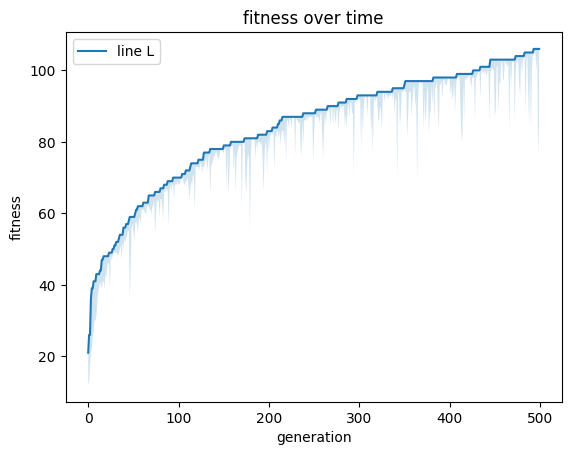

In [18]:
import matplotlib.pyplot as plt

x  = range(num_generations)
plt.plot(x, max_fitnesses, label="line L")
plt.fill_between(x, min_fitnesses, max_fitnesses, alpha=0.2)
plt.plot()

plt.xlabel("generation")
plt.ylabel("fitness")
plt.title("fitness over time")
plt.legend()
plt.show()

Finally, because the recipe is always sorted according to fitness, the fittest individual will be the one in the first position, so we can print this out.